<a href="https://colab.research.google.com/github/shiny880410/helloworld/blob/master/final/files/Final_NN_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

分別上傳要training的x data與y data。

In [0]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')
!cp 'gdrive/My Drive/Colab Notebooks/復興南/train data/xtrain1.csv' 'xtrain1.csv'
!cp 'gdrive/My Drive/Colab Notebooks/復興南/train data/ytrain1.csv' 'ytrain1.csv'
!cp 'gdrive/My Drive/Colab Notebooks/復興南/train data/xtest1.csv' 'xtest1.csv'
!cp 'gdrive/My Drive/Colab Notebooks/復興南/train data/ytest1.csv' 'ytest1.csv'
!ls
X_train = pd.read_csv("xtrain1.csv", header=None)
Y_train = pd.read_csv("ytrain1.csv", header=None)
X_test = pd.read_csv("xtest1.csv", header=None)
Y_test = pd.read_csv("ytest1.csv", header=None)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive		model_loss.png	xtest1.csv   ytest1.csv
model_loss.jpg	sample_data	xtrain1.csv  ytrain1.csv


載入上次的模型，就可以分次train data。

In [0]:
from keras.models import load_model
from keras.models import load_model
from google.colab import files
#file = files.upload()
# 刪除既有模型變數
del classifier
# 載入模型
#classifier = load_model('classifier1.h5')

透過不停地調整，設定適合的結點與層數。

In [0]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 18, activation = 'relu', input_dim = 3,kernel_initializer='normal'))
classifier.add(Dense(units = 18, activation = 'relu',kernel_initializer='normal'))
classifier.add(Dense(units = 9, activation = 'relu',kernel_initializer='normal'))
classifier.add(Dense(units = 3, activation = 'relu',kernel_initializer='normal'))
classifier.add(Dense(units = 1, activation = 'relu',kernel_initializer='normal'))
classifier.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

優化模型。

丟入training data進行訓練，在我們的資料中，以 π2、 π3、 π4為x data，π1為y-data，輸入兩萬多筆資料讓其建構適合的網絡。每次train完都把網絡存下來，下次就不需要重新train。

In [0]:

history = classifier.fit(X_train, Y_train, validation_split=0.2, epochs=700, batch_size = 100, verbose=2)  
scores = classifier.evaluate(X_train, Y_train)  
print(scores)
#from keras.models import model_from_json
#json_string = classifier.to_json() 
#with open("classifier1.config", "w") as text_file:    
#text_file.write(json_string)
#權重(W)存檔：以下程式將權重存到 model.weight 檔案。
#classifier.save_weights("classifier1.weight")
#同時儲存結構與權重，檔案的類別為HDF5。
#from keras.models import load_model
#classifier.save('classifier1.h5')  # creates a HDF5 file 'model.h5'
# summarize history for loss


Train on 20479 samples, validate on 5120 samples
Epoch 1/700
 - 1s - loss: 1235866.5942 - acc: 0.0000e+00 - val_loss: 308750.6435 - val_acc: 0.0000e+00
Epoch 2/700
 - 0s - loss: 281180.2076 - acc: 0.0000e+00 - val_loss: 297252.5645 - val_acc: 0.0000e+00
Epoch 3/700
 - 0s - loss: 271714.2621 - acc: 0.0000e+00 - val_loss: 283742.2930 - val_acc: 0.0000e+00
Epoch 4/700
 - 0s - loss: 260916.8195 - acc: 0.0000e+00 - val_loss: 274241.4682 - val_acc: 0.0000e+00
Epoch 5/700
 - 0s - loss: 247459.6741 - acc: 0.0000e+00 - val_loss: 253555.7916 - val_acc: 0.0000e+00
Epoch 6/700
 - 0s - loss: 226057.5581 - acc: 0.0000e+00 - val_loss: 225054.6529 - val_acc: 0.0000e+00
Epoch 7/700
 - 0s - loss: 185855.9739 - acc: 0.0000e+00 - val_loss: 174267.5694 - val_acc: 0.0000e+00
Epoch 8/700
 - 0s - loss: 134570.0833 - acc: 0.0000e+00 - val_loss: 136822.7414 - val_acc: 0.0000e+00
Epoch 9/700
 - 0s - loss: 115491.2685 - acc: 0.0000e+00 - val_loss: 139179.9374 - val_acc: 0.0000e+00
Epoch 10/700
 - 0s - loss: 11328

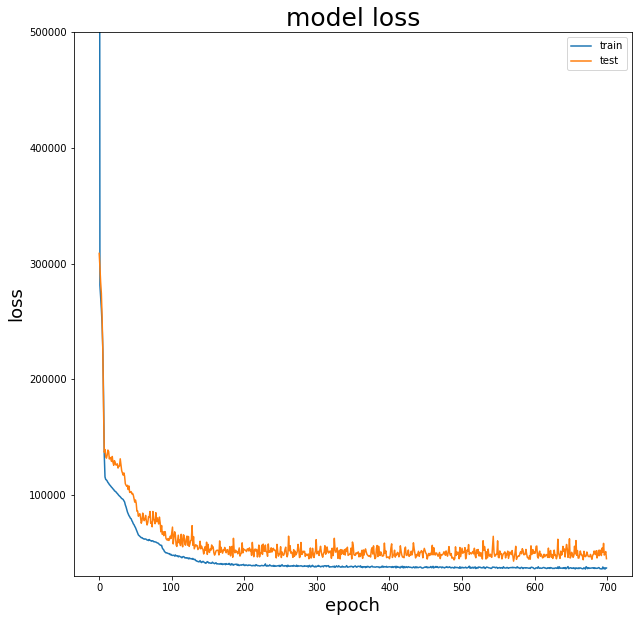

In [0]:
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim((30000, 500000))
plt.title('model loss',fontsize=25)
plt.ylabel('loss',fontsize=18)
plt.xlabel('epoch',fontsize=18)
plt.legend(['train', 'test'], loc='upper right',fontsize=10)
plt.savefig("model_loss.jpg")
files.download("model_loss.jpg")
plt.show()

試著放入新的(沒有被辨識過的資料)進行預測，以下為預測出之車速。

In [0]:
Y_pred = classifier.predict(X_test)
#Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]
print(Y_pred)

[[1089.322  ]
 [1242.6903 ]
 [ 846.86127]
 [1977.231  ]
 [ 897.96967]
 [ 944.6362 ]
 [1531.5007 ]
 [ 852.04926]
 [1002.68304]
 [1271.6066 ]
 [1251.7395 ]
 [1900.0184 ]
 [ 538.04034]
 [1286.0505 ]
 [1018.31055]
 [ 418.34818]
 [ 699.8905 ]
 [ 681.5972 ]
 [ 940.80255]
 [ 569.0561 ]
 [ 862.89667]
 [ 977.2502 ]
 [1214.6798 ]
 [1069.7369 ]
 [1704.6793 ]
 [ 829.5415 ]
 [ 946.0245 ]
 [1657.6925 ]
 [1013.5458 ]
 [1002.68304]]


將輸出資料與原資料進行比較並計算誤差，並定義誤差在10%以內為成功，反之則為失敗。

In [0]:
Y_pred = classifier.predict(X_test)
#Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]
total = 0
correct = 0
wrong = 0
for i in Y_pred:
  a = (Y_test.at[total,0] - i)/Y_test.at[total,0]
  print("%d,%d%%"%(i,a*100))
  if( abs((Y_test.at[total,0] - i)/Y_test.at[total,0])<=0.1):
    correct=correct+1
  else:
    wrong=wrong+1
  total=total+1
print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

1089,6%
1242,-8%
846,8%
1977,-9%
897,1%
944,-5%
1531,4%
852,4%
1002,0%
1271,-3%
1251,8%
1900,-5%
538,7%
1286,-13%
1018,16%
418,0%
699,0%
681,0%
940,-5%
569,5%
862,-7%
977,19%
1214,-17%
1069,4%
1704,-9%
829,4%
946,-4%
1657,-4%
1013,1%
1002,0%
Total 30
Correct 26
Wrong 4


In [0]:

from google.colab import files
#file = files.upload()
#!rm xtrain1.csv
#!rm ytrain1.csv
#!rm xtest1.csv
#!rm ytest1.csv
#classifier.save('gdrive/My Drive/Colab Notebooks/復興南/train data/classifier1.h5')
!ls

gdrive		sample_data  xtrain1.csv  ytrain1.csv
model_loss.png	xtest1.csv   ytest1.csv
